In [4]:
import numpy as np
import qiskit
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Basic Quantum Circuit 

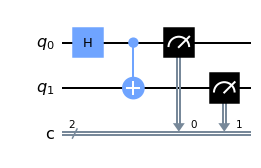

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
# qc.h(0)
qc.measure(range(2), range(2))
qc.draw()

In [3]:
backend_simulator = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc, backend_simulator, shots=1024)

In [4]:
result_simulator = job_simulator.result()

In [5]:
count = result_simulator.get_counts(qc)
count

{'11': 503, '00': 521}

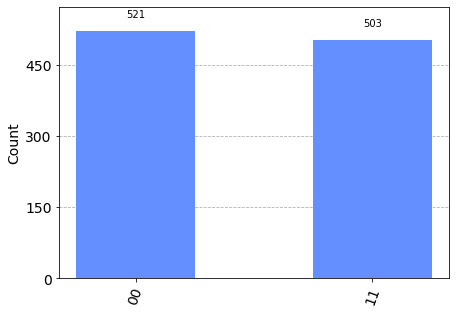

In [6]:
plot_histogram(count)

### Execute on real Hardware

In [7]:
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
backend = provider.get_backend('ibmq_belem')

In [9]:
# job_simulator = execute(qc, backend, shots=1024)
# result_simulator = job_simulator.result()

In [10]:
# count = result_simulator.get_counts(qc)
# count

### Quantum State Visualization

In [12]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

In [23]:
qc=qiskit.QuantumCircuit(1)
statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")
result = qiskit.execute(qc,statevector_simulator).result()
statevector_result = result.get_statevector(qc)
statevector_result

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


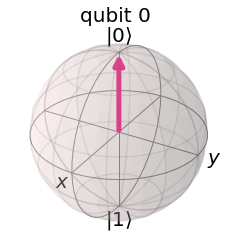

In [24]:
 plot_bloch_multivector(statevector_result)

----
# Parameterized quantum circuits 
----

In [1]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
decomposed_circuit = qc_zz.decompose()

## ZZFeatureMapCircuit Expression

##### $$\Large{u}_{\normalsize{\Phi(x)}} = \normalsize{ \prod\limits_{d}U_{\Phi(x)} H^{\otimes n}}
, U_{\Phi(x)} = \exp\left( i\sum\limits_{S\subseteq[n]}\phi_{s}(x)\prod\limits_{k\in S}P_i \right)$$


##### $$\phi_s:x\mapsto \begin{cases}
x_i & \text{ if } s= \{i\} \\ 
(\pi-x_i)(\pi-x_j) & \text{ if } s= \{i,j\} 
\end{cases}$$

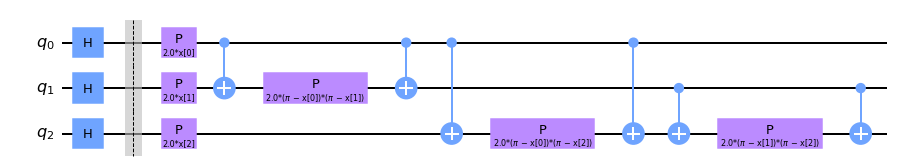

In [2]:
decomposed_circuit.draw()

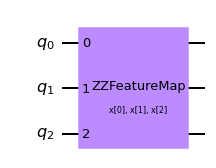

In [3]:
qc_zz.draw()